This dataset consists of tv shows and movies available on **Netflix as of 2021**(The dataset was updated). The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an **interesting report** which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.shape

(7787, 12)

Lets check how many data values are null in the dataset...

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

As we can see the columns director and cast are not relevant enough for the analysis and the dataset contain a lot of null values in these attribute. Thus we prefer to drop them...

In [6]:
df.drop(['director'], inplace = True, axis = 1)
df.drop(['cast'], inplace = True, axis = 1)

In [7]:
df.isnull().sum()

show_id           0
type              0
title             0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

Now the NaN value is filled with the value that ocuured the most in the column.

In [8]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

Here we can see the **null** values are now less in data. And the data is more feasible to work.

In [9]:
df.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

Lets see the propotion TV show and Movie

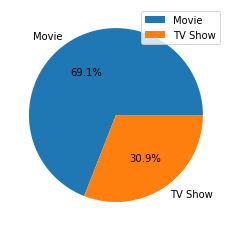

In [10]:
plt.figure(figsize= (4,4))
percent = df['type'].value_counts()
val = percent.index
plt.pie(percent.values, labels = val,autopct="%1.1f%%")
plt.legend()
plt.show()

As the proportions are as displayed, thus **Movies** [almost 70% of the data] are released more than **TV shows** as for the data gathered till 2021.  

**Ratings** are main attribute here that can provide a idea of the customer satisfaction relation to other attributes. Lets see how the data looks...

In [11]:
df["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

Narrowing down the vast categories to 4 main categories to understand the distribution. The categories are:- 
1. ADULTS
2. TEEN
3. OUTER KIDS
4. KIDS 

In [12]:
ratings_cat = {
    'TV-MA': 'Adults',
    'R': 'Adults',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'TV-PG': 'Older Kids',
    'NR': 'Adults',
    'TV-G': 'Kids',
    'TV-Y': 'Kids',
    'nan' : 'null',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'NC-17': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Adults',
}

In [13]:
df["ratings_cat"] = df["rating"].replace(ratings_cat)

<AxesSubplot:xlabel='count', ylabel='ratings_cat'>

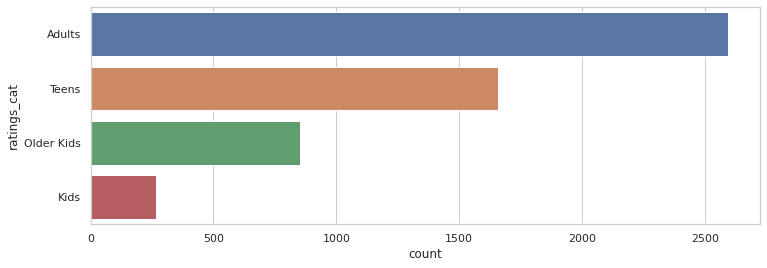

In [14]:
plt.figure(figsize = (12,4))
sns.set_theme(style="whitegrid")

tv = df[df['type'] == 'TV Show']
movie = df[df['type'] == 'Movie']

count = movie.groupby(['ratings_cat'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
sns.barplot(x = count['count'] , y = count['ratings_cat'])

So, here we can see that most of the movies released are of adult category with ratings:-
1. TV-MA
2. R
3. NR
4. NC-17
5. UR

<AxesSubplot:xlabel='ratings_cat', ylabel='release_year'>

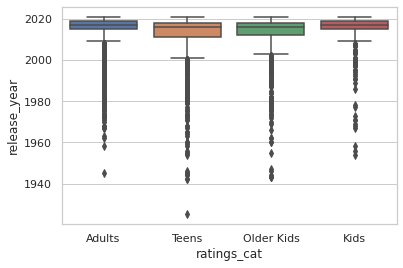

In [15]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="ratings_cat",y="release_year",data=df)

That explains the focus is more on the **TEENS** in the span of the years. But as of in 2020 the distribution is more focused on the **KIDS and ADULTS**. 

<AxesSubplot:title={'center':'RELEASE RATEs'}>

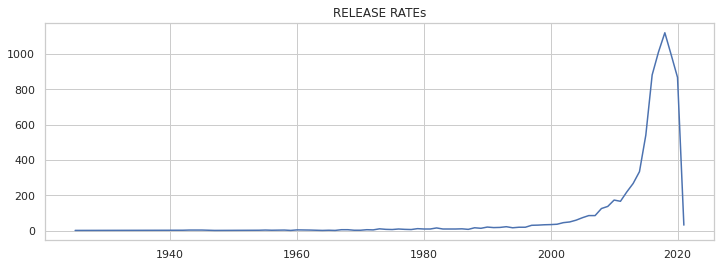

In [16]:
plt.figure(figsize = (12,4))
rate_count = df['release_year'].value_counts()
plt.title("RELEASE RATEs")
sns.lineplot(x =rate_count.index , y= rate_count.values)

It seams the data is **more concentrated** between 2000 and 2020 release dates. Lets dig that in more...

<AxesSubplot:title={'center':'RELEASE RATE BETWEEN 2000 TO 2021'}>

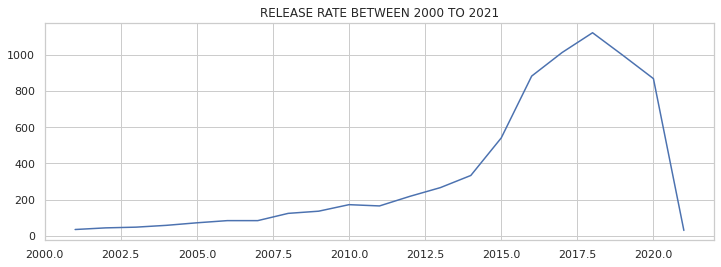

In [17]:
plt.figure(figsize= (12,4))
lastdec = rate_count.loc[rate_count.index > 2000]
plt.title("RELEASE RATE BETWEEN 2000 TO 2021")
sns.lineplot(x = lastdec.index , y= lastdec.values)

Here we can see major release started from **2012 and in 2017 there was surge in release**.

Lets see what type was more prominent in recent years where release was highest...

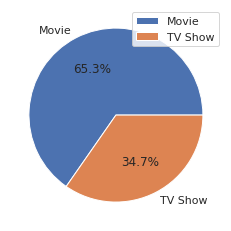

In [18]:
plt.figure(figsize = (4,4))

data_lastdec = df.loc[df['release_year'] > 2012]
data_lastdec_count = data_lastdec['type'].value_counts()
plt.pie(data_lastdec_count.values ,labels = data_lastdec_count.index,autopct="%1.1f%%")
plt.legend()
plt.show()

So, we see that from year 2012 to 2021 the **Movies were more frequently released than TV shows**.

Lets see what categories were most released in these years...

<AxesSubplot:xlabel='count', ylabel='ratings_cat'>

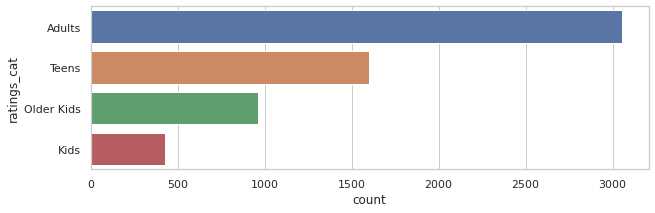

In [19]:
plt.figure(figsize =(10,3))
count = data_lastdec.groupby(['ratings_cat'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
sns.barplot(x = count['count'] , y = count['ratings_cat'])

The **ADULT** categories were prominent from 2012 to present year. Lets see what categories in **movies** were prominent as they where the one with most releases.

<AxesSubplot:title={'center':'RATINGS WITH HIGHEST NUMBER OF MOVIES RELEASED'}, xlabel='count', ylabel='ratings_cat'>

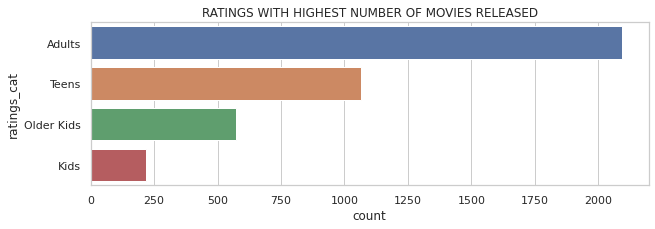

In [20]:
plt.figure(figsize =(10,3))
data_lastdec_movie = data_lastdec.loc[data_lastdec['type'] == 'Movie']
count = data_lastdec_movie.groupby(['ratings_cat'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
plt.title("RATINGS WITH HIGHEST NUMBER OF MOVIES RELEASED")
sns.barplot(x = count['count'] , y = count['ratings_cat'])

And again we can check that the **same category(ADULT)** was the one in which most movies where released from 2012 till now..

<Figure size 1080x360 with 0 Axes>

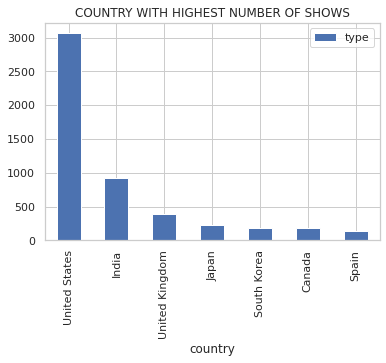

In [21]:
plt.figure(figsize = (15,5))
sns.set_theme(style="whitegrid")

country_count = pd.crosstab(df["country"],["type"]).sort_values(by = 'type',ascending=False )
country_count.head(7).plot(kind="bar")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF SHOWS")
plt.show()

Here we can see overall **United States** does have most shows under its belt followed by **India**. Lets check how the type of shows are distributed country wise...

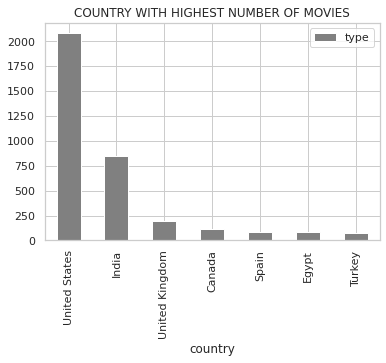

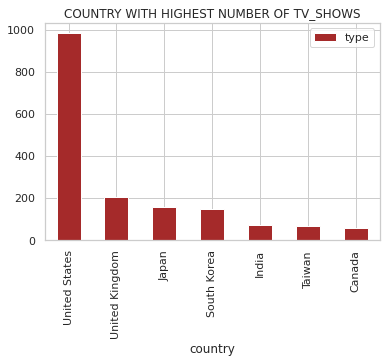

In [22]:
country_count = pd.crosstab(movie["country"],["type"]).sort_values(by = 'type',ascending=False )
country_count.head(7).plot(kind="bar",color ="grey")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF MOVIES")
plt.show()

country_count = pd.crosstab(tv["country"],["type"]).sort_values(by = 'type',ascending=False )
country_count.head(7).plot(kind="bar",color ="brown")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF TV_SHOWS")
plt.show()

So, we can see that US has both types under its belt with most releases, whereas the followed up country varied.
But overall **US and India** has the base in releasing frequency. 

Text(0.5, 1.0, 'DURATION OF TV')

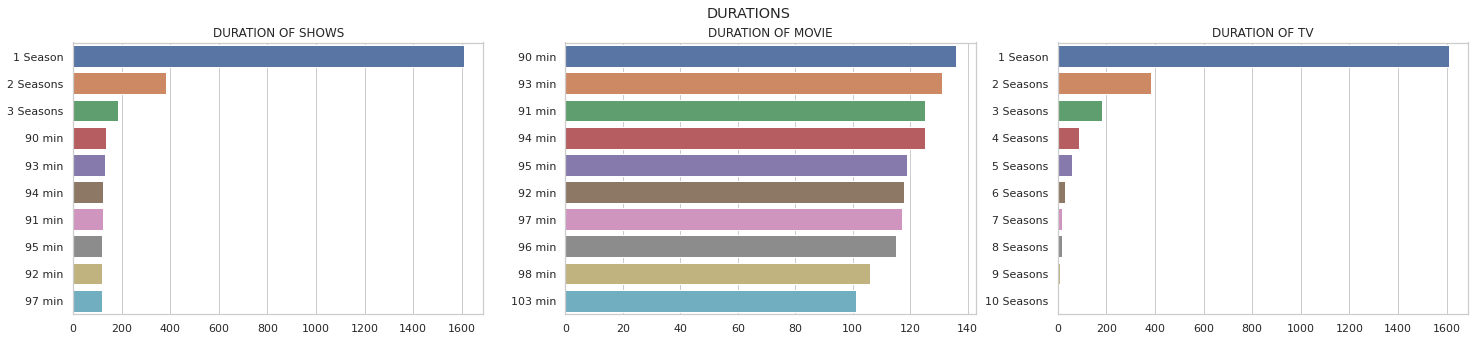

In [23]:
fig, axs = plt.subplots(1,3,figsize = (25,5))
fig.suptitle("DURATIONS")

gen_dur = df["duration"].value_counts().head(10)
sns.barplot(ax = axs[0], x = gen_dur.values, y = gen_dur.index)
axs[0].set_title('DURATION OF SHOWS')

movie_dur = movie["duration"].value_counts().head(10)
sns.barplot(ax = axs[1], x = movie_dur.values, y =  movie_dur.index)
axs[1].set_title('DURATION OF MOVIE')

tv_dur = tv["duration"].value_counts().head(10)
sns.barplot(ax = axs[2], x = tv_dur.values, y = tv_dur.index)
axs[2].set_title('DURATION OF TV')

Here, we can see that the general duration irrespective of type are much restricted **to one season only** and the those shows with these duration are frequently more.
If we check duration of movies and tv shows we can see in case of movie, the duration are **maximum times within 90min** and in tv shows again its just season one.

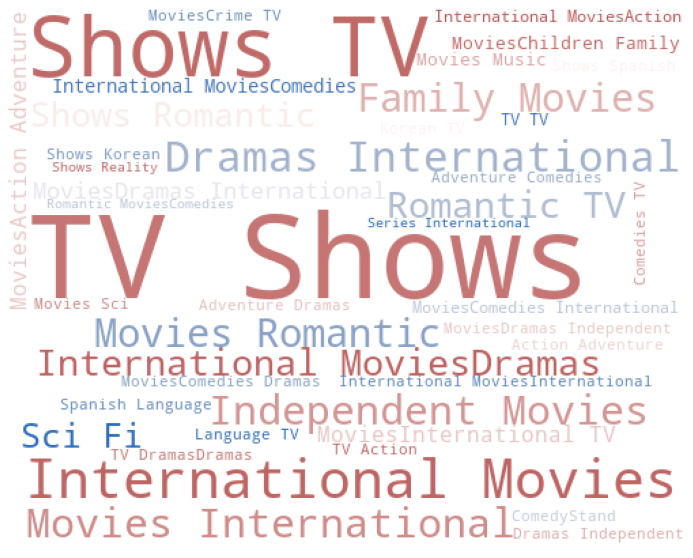

In [24]:
import wordcloud as wc
plt.figure(figsize= (20,10))
words= "".join(df["listed_in"])
final = wc.WordCloud(width = 500, height = 400, background_color ="white", colormap='vlag',min_font_size = 10, max_words = 100).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()

Please Upvote and Comment for feedbacks. Please help me grow!!